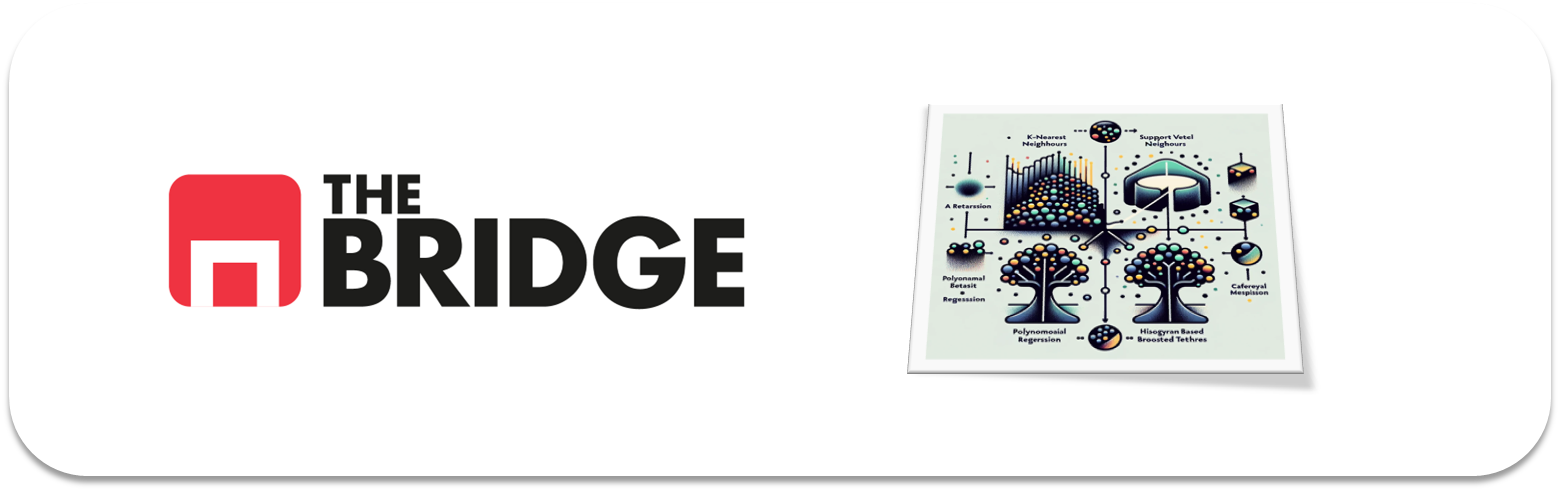

# Otros Modelos: Support Vector Machine

### Concepto y modelado lineal para clasificación


En esta primera parte te explico muy por encima el concepto que hay detrás del modelo, pero no es fundamental que lo memorices.

Partimos de este conjunto de datos y queremos hacer un modelo de clasificación

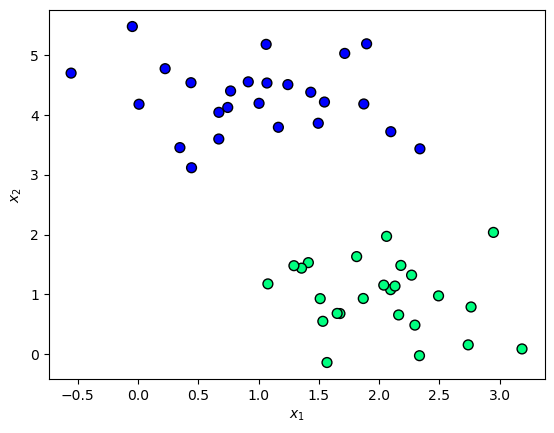

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Existen infinitos separadores (modelos) que separan perfectamente ambas clases

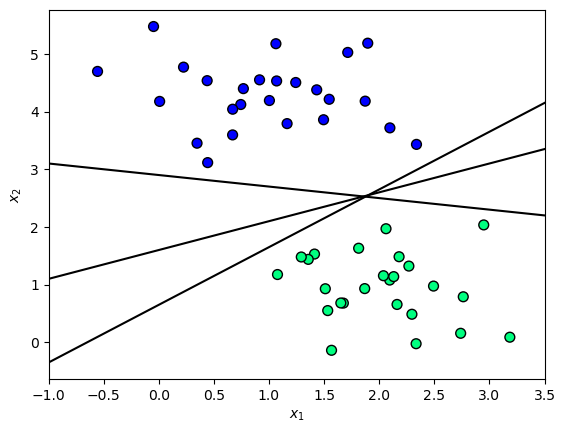

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')


for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

¿Cuál es el mejor separador? 

Empecemos analizando cuál es el separador de la regresión logística

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X,y)
lr.intercept_, lr.coef_

(array([4.81393202]), array([[ 0.57306256, -2.18013484]]))

$\Large y = \theta(4.81 + 0.573x_1 - 2.18x_2)$, donde $\Large \theta$ es la función sigmoide:

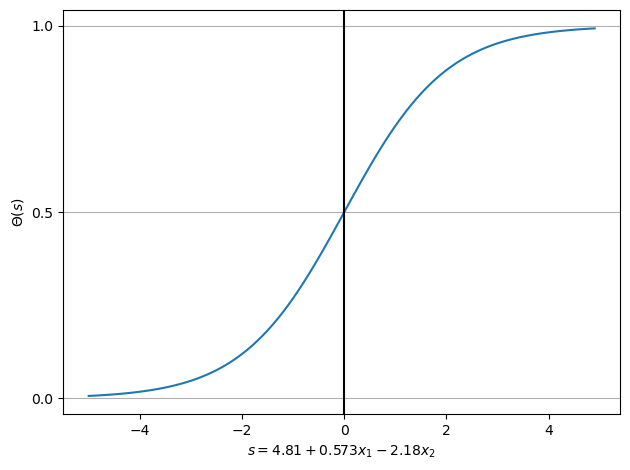

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.arange(-5, 5, 0.1)
phi_z = sigmoid(z)
 
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('$s=4.81 + 0.573x_1 - 2.18x_2$')
plt.ylabel('$\Theta(s)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

En regresión logística, la predicción queda determinada por la ecuación $\theta(s)=\theta(w_0+w_1x_1+w_2x_2+...+w_Nx_N)$. Cuando $s=0$,  $\theta(s)=0.5$, que suele ser el umbral para clasificar una categoría u otra. 

En este ejemplo $s=4.81 + 0.573x_1 - 2.18x_2$. Si igualamos a cero, obtenemos la ecuación de la recta separadora:

$4.81 + 0.573x_1 - 2.18x_2=0$  
  
$2.18x_2 = 0.573x_1 + 4.81$   
  
$x_2=\frac{0.573}{2.18}x_1 + \frac{4.81}{2.18}$
  
$x_2 = 0.263x_1 + 2.206 $

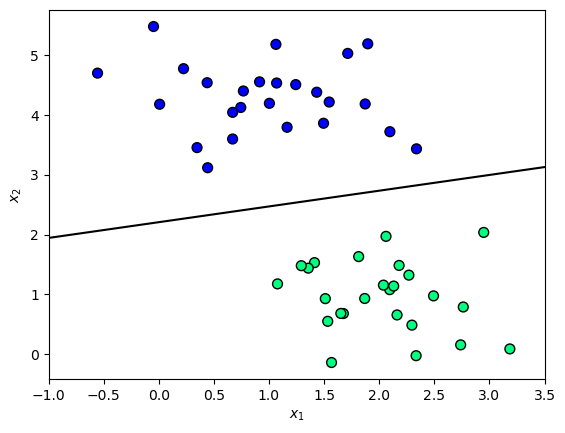

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

**Support vector machines** busca establecer un separador con el mayor margen posible a las muestras más cercanas

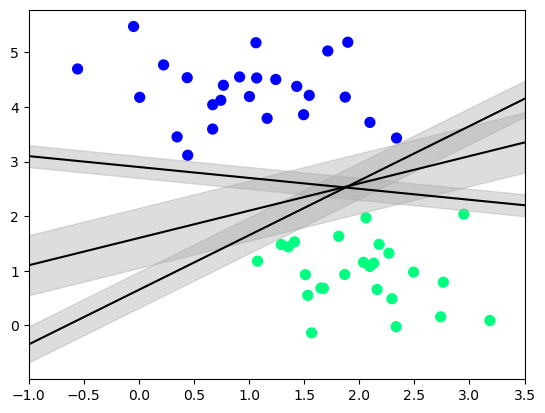

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

La recta separadora que maximice este margen será escogida como el mejor modelo.

In [7]:
from sklearn.svm import SVC # "support vector classifier"

model = SVC(kernel='linear', C=1e10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

Fíjate por un segundo antes de seguir que existe ese argumento kernel (luego volveremos a él)

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,facecolors='none', edgecolors='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

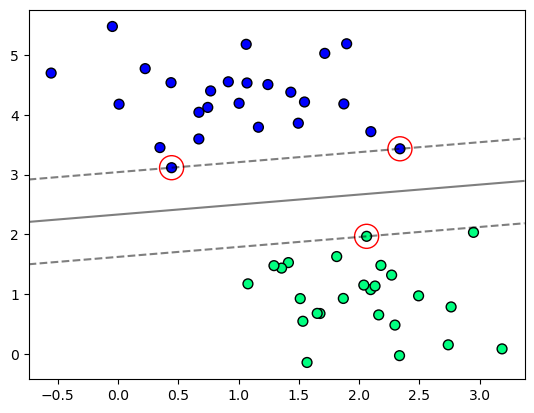

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');
plot_svc_decision_function(model);


Esta recta separadora maximiza el margen entre los dos conjuntos de puntos. Fíjate que alguno de los puntos están justo en el margen, indicados con círculos rojos. Estos puntos son los vectores de soporte, que dan nombre al algoritmo.

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Si pintamos la recta de la regresión logística que calculamos anteriormente, vemos que no es exactamente la misma

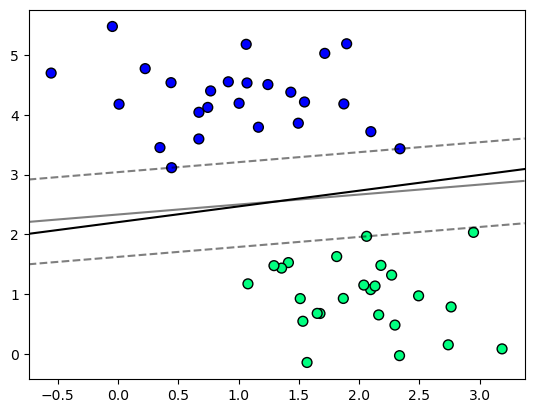

In [11]:
# Datos
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter', edgecolors='k')

# SVM
plot_svc_decision_function(model, plot_support=False)

# Regresión Logística
xfit = np.linspace(-1, 3.5)
m=0.263
b=2.206
plt.plot(xfit, m * xfit + b, '-k')

**

### Matizaciones

* Este algoritmo es sensible al escalado de las variables

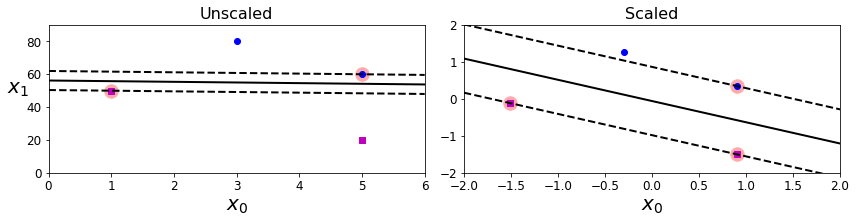

* Este algoritmo es muy sensible a outliers, hay que tratarlos (quitarlos y luego considerar esos puntos con otro modelo por ejemplo)

* Es muy sensible a la existencia de una zona de soporte (de margen entre las clases). Por eso tiene un hiperparámetros C que permite que algunos puntos caigan en la zona de soporte o seguridad. A C más alto más estricto.

En general no es un modelo que nosotros vayamos a utilizar, pero puede que tú si quieras probarlo y alguna vez lo necesites. [Aquí](https://scikit-learn.org/stable/modules/svm.html) tienes una referencia para profundizar más. Nosotros vamos a limitarnos a presentar otros "kernels" y su concepto y ahí lo dejamos.

### Kernels: SVM como clasificadores no lineales

Una forma un poco "grosera" de ver la generalización de este tipo de modelos es considerar los conceptos del apartado anterior pero en que antes de aplicarlos a los datos se les transforma (como hacíamos con la transformación a polinomio de las regresiones lineales en la sesión anterior). A esa transformación previa se le denomina "kernelización" o sea aplicación de un kernel o transformación. De hecho SVM tiene un "kernel" ("poly") con el que se imita prácticamente una regresión polinómica.

Vamos a ver dos kernel (no hace falta que te aprendas la fórmula matemática que sigue es por pura completitud teórica)[NOTA: ya hemos visto una más el "linear" que es el que hemos aplicado antes]

**Kernel polinómico**: Transformamos la dimensión de entrada a través de un polinomio de grado *d*. Por ejemplo, para $d=2$: 
$(x_1, x_2) \rightarrow (x_1, x_2, x_1x_2, x_1^2, x_2^2)$  

**Kernel RBF (Radial Basis Function)**: traslada los datos a una dimensión infinita  
$(x_1, x_2) \rightarrow \exp(-\gamma||x_1 - x_2||^2)$

Veamos algún ejemplo con datos no linealmente separables

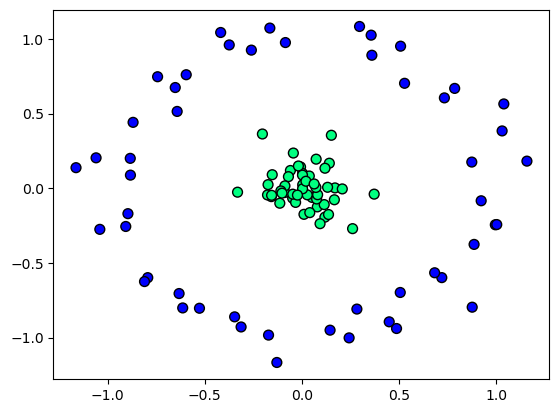

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k');

**Kernel lineal**

In [13]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear').fit(X,y) # Se instancia igual, solo hay que cambiar el argumenot 'kernel'

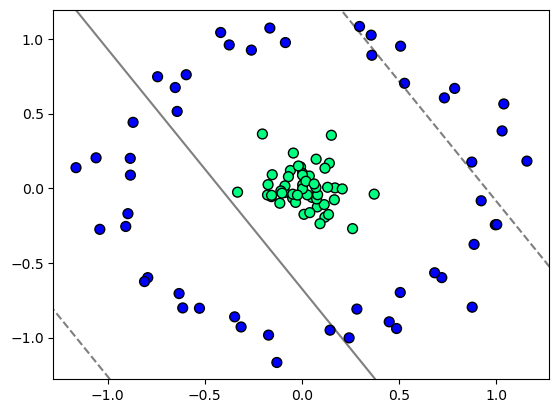

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf, plot_support=False);

**Kernel polinómico de grado 2**

In [15]:
clf = SVC(kernel='poly', degree=2,C=1e6)
clf.fit(X,y)

SVC(C=1000000.0, degree=2, kernel='poly')

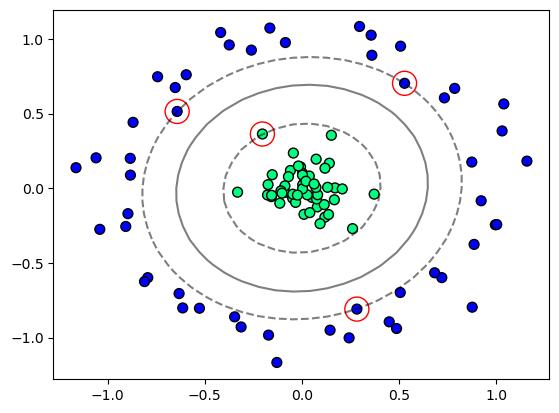

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

**Kernel RBF**

In [17]:
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X,y)

SVC(C=1000000.0)

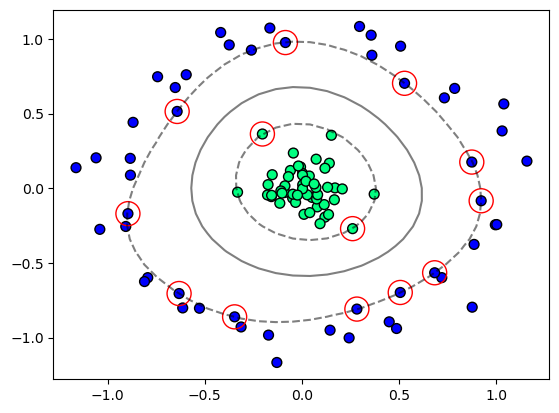

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter',edgecolors='k')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### SVM en regresión

Aunque SVM es conocido por ser un modelo de clasificación, también puede utilizarse en regresiones, siendo su planteamiento muy similar, aunque no vamos a profundizar en ello, solo vamos a ver cómo se aplica:


In [19]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

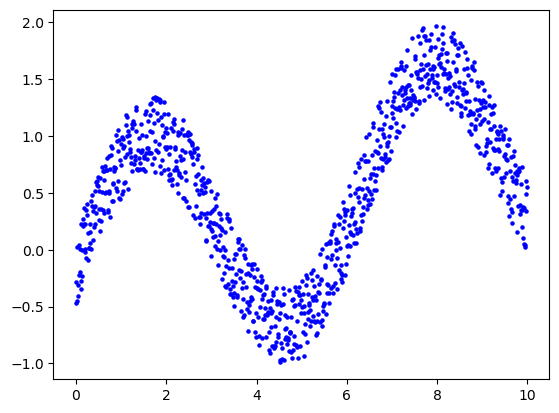

In [20]:
np.random.seed(21)

N =1000

def makeData(x):
    r = [a/10 for a in x]
    y = np.sin(x)+np.random.uniform(-0.5, 0.2, len(x))
    return np.array(y+r)

x = [i/100 for i in range(N)]
y = makeData(x)
x = np.array(x).reshape(-1,1)

plt.scatter(x,y,s=5,color="blue");

In [21]:
svr = SVR() # Por defecto el kernel es el RBF
svr.fit(x,y)

SVR()

In [23]:
yfit = svr.predict(x)

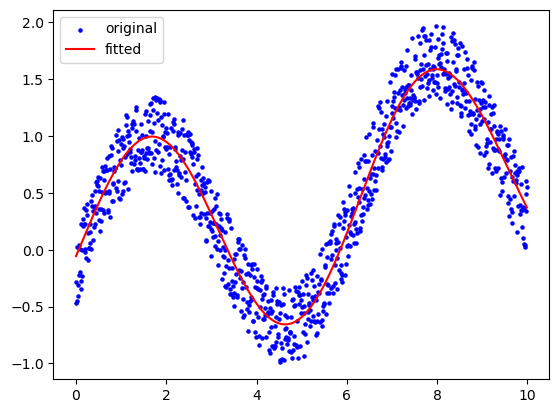

In [24]:
plt.scatter(x, y, s=5, color="blue", label='original')
plt.plot(x, yfit, color="red", label='fitted')
plt.legend()
plt.show()

In [25]:
score = svr.score(x, y)
print('R-squared:', score)
print('MSE:', mean_squared_error(y,yfit))

R-squared: 0.9201610722643554
MSE: 0.041676600207571246
